In [12]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
from pathlib import Path
from tempfile import mkdtemp
from shutil import rmtree
from tqdm import trange

Configs

In [2]:
data_path = Path("Data_points")
controller_paths = {"CPG": "CPG", "Rule-based": "Decentralized", "Hybrid": "hybrid"}
terrain_types = ["flat", "blocks", "gapped", "mixed"]
enable_adhesion = True

Index video files

In [3]:
video_paths = {}
for controller, tag in controller_paths.items():
    for terrain in terrain_types:
        matches = list(
            data_path.glob(f"{terrain}_{tag}pts_adhesion{enable_adhesion}*/*.mp4")
        )
        video_paths[(controller, terrain)] = sorted(matches)

Load videos

In [4]:
fps = None
num_frames = None
all_videos = {}
for (controller, terrain), video_path in video_paths.items():
    print(f"Loading videos for {controller} on {terrain}")
    all_videos[(controller, terrain)] = []
    for path in video_path:
        vid = imageio.get_reader(path)
        metadata = vid.get_meta_data()
        if fps is None:
            fps = metadata["fps"]
        else:
            assert fps == metadata["fps"], "FPS is not the same"
        frames = []
        while True:
            try:
                frame = vid.get_next_data()
                frames.append(frame)
            except IndexError:
                break
        if num_frames is None:
            num_frames = len(frames)
        else:
            assert num_frames == len(frames), "Number of frames is not the same"
        all_videos[(controller, terrain)].append(frames)

Loading videos for CPG on flat
Loading videos for CPG on blocks
Loading videos for CPG on gapped
Loading videos for CPG on mixed
Loading videos for Rule-based on flat
Loading videos for Rule-based on blocks
Loading videos for Rule-based on gapped
Loading videos for Rule-based on mixed
Loading videos for Hybrid on flat
Loading videos for Hybrid on blocks
Loading videos for Hybrid on gapped
Loading videos for Hybrid on mixed


Draw one frame

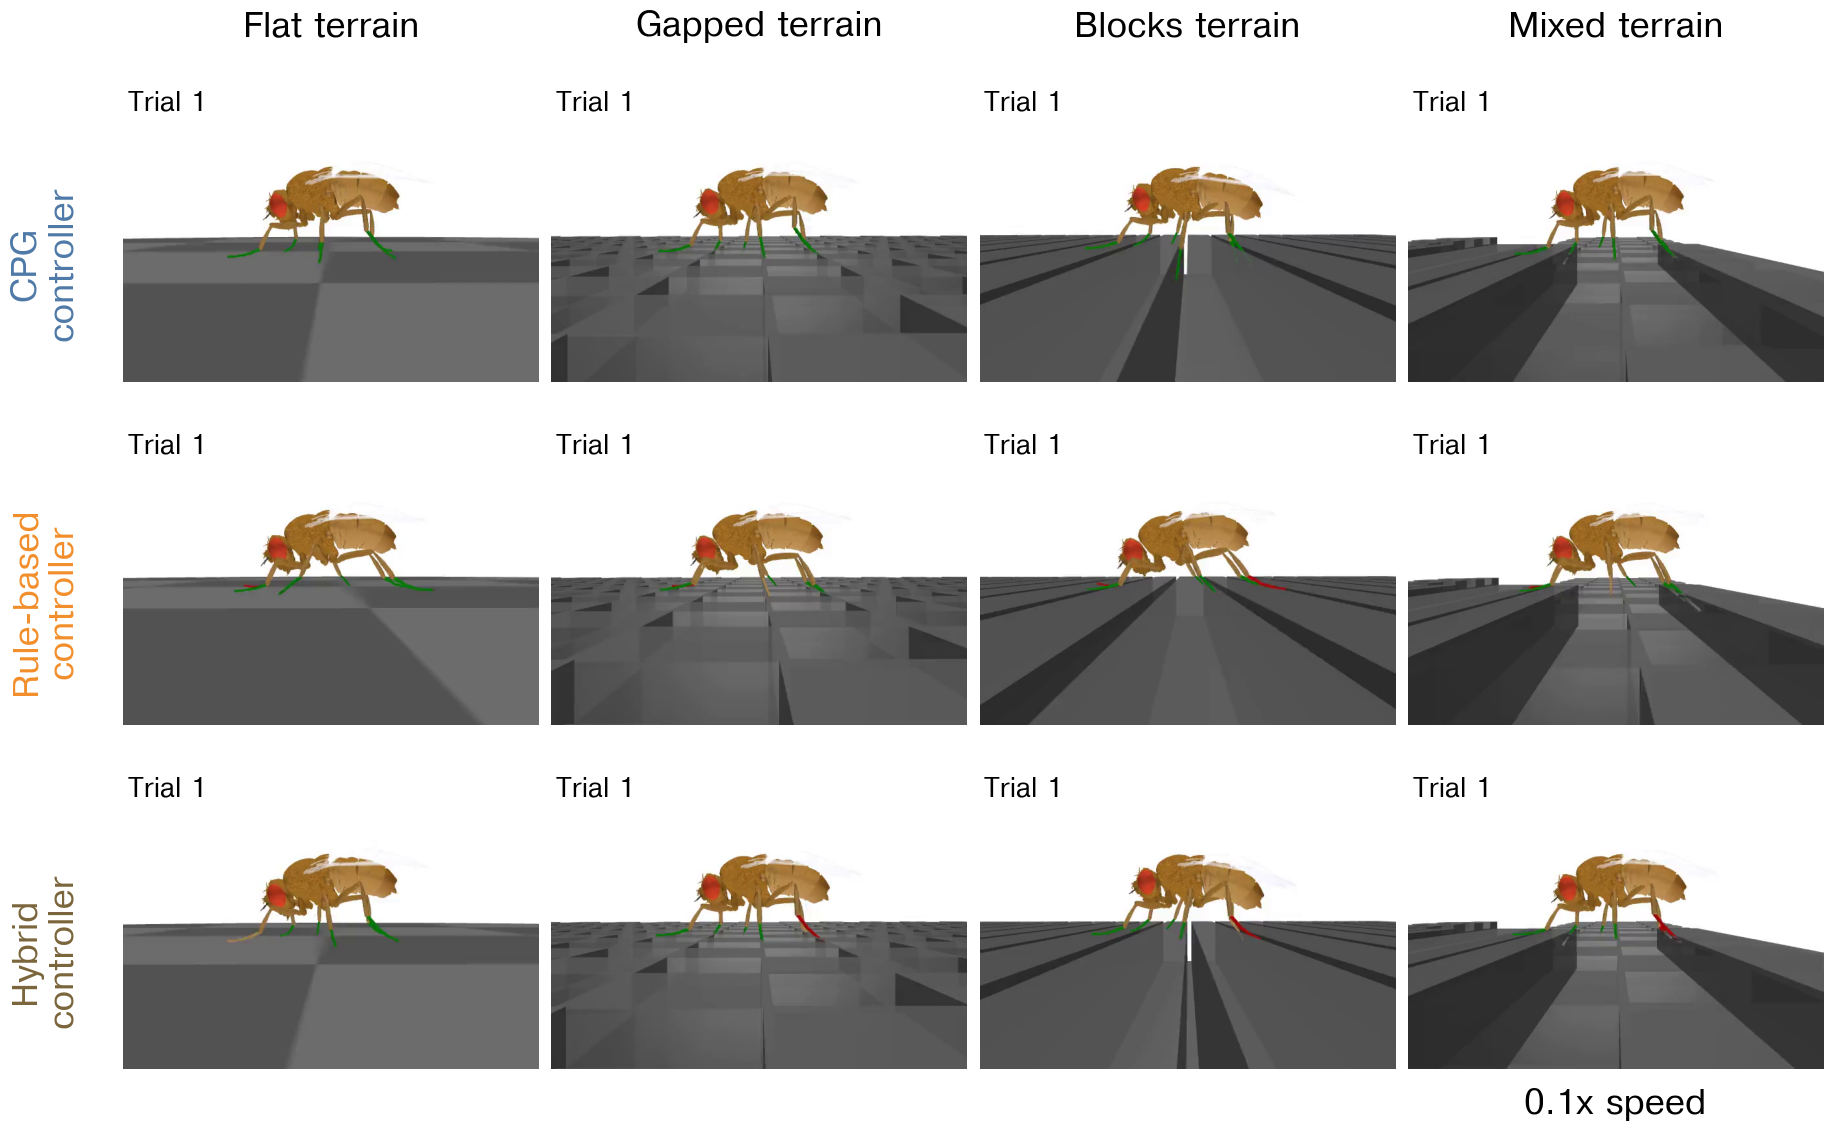

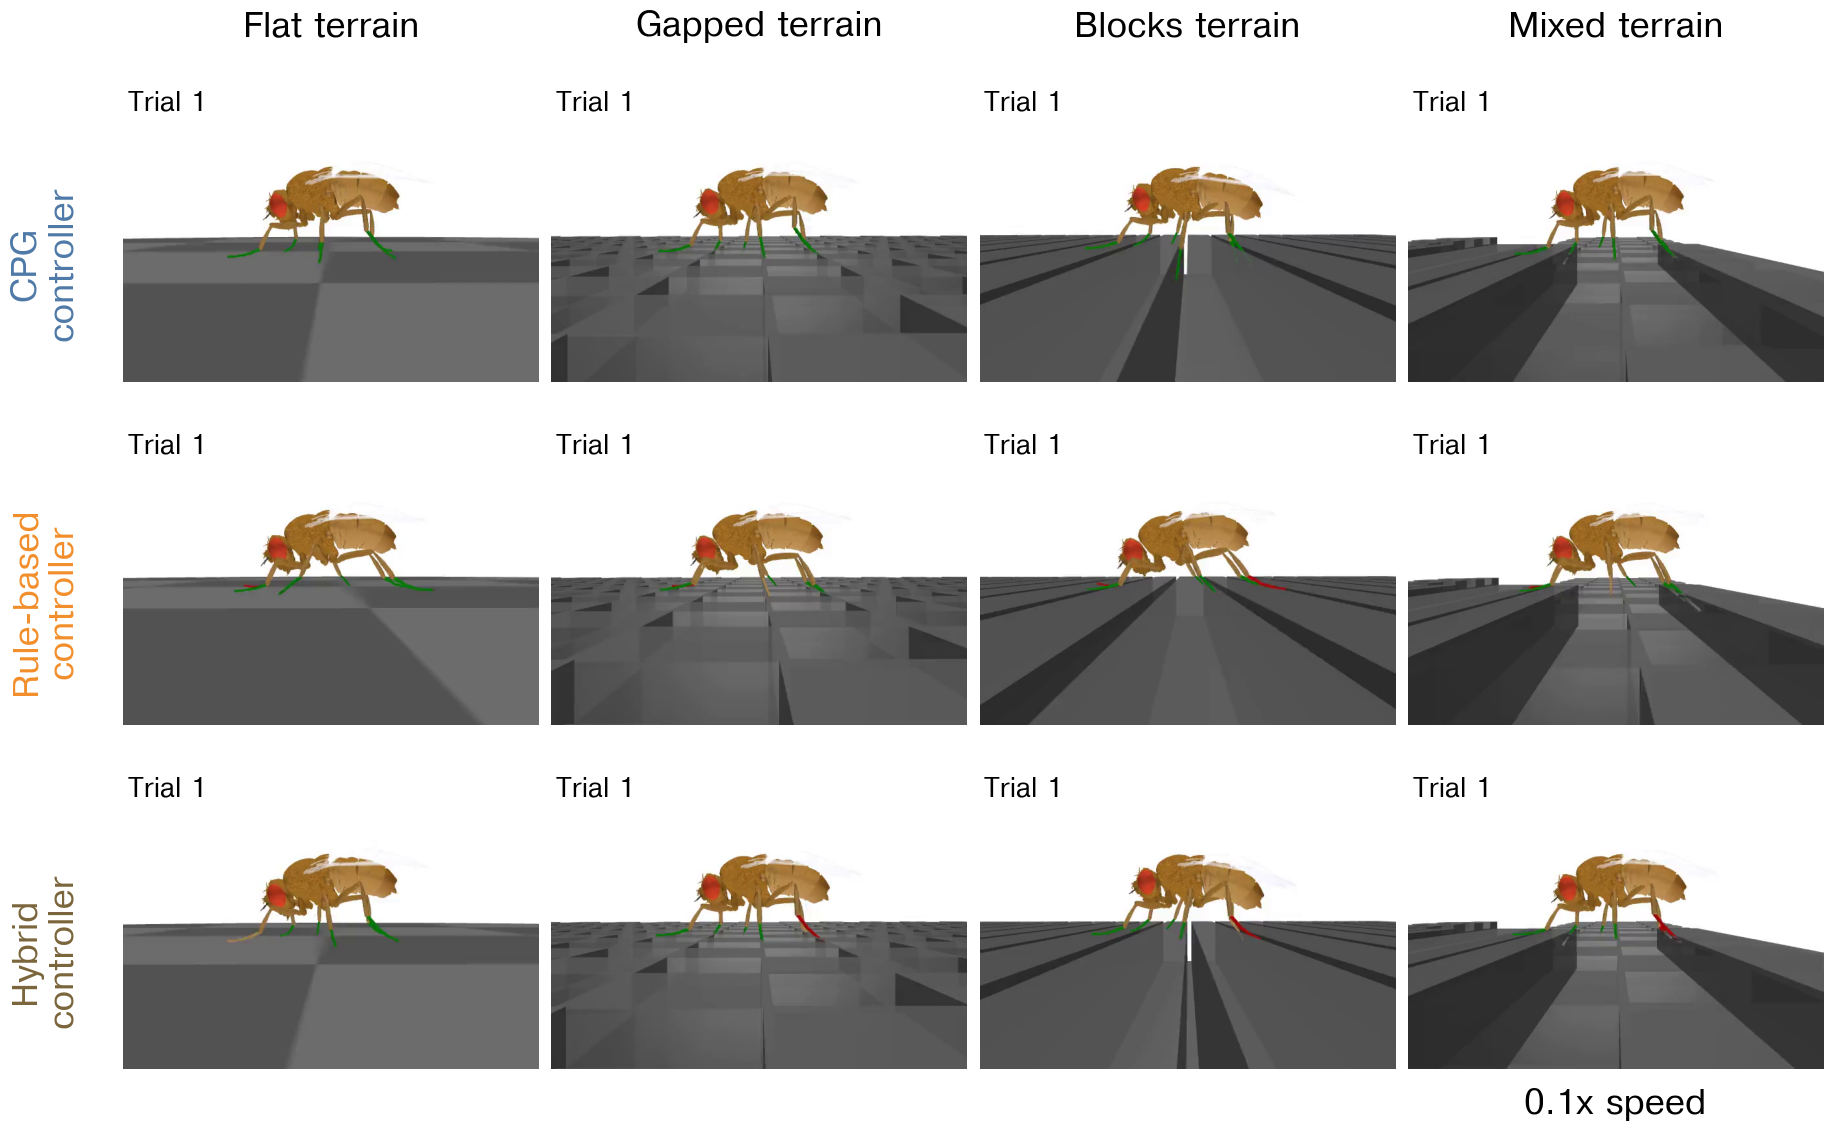

In [15]:
# import pylustrator
# pylustrator.start()


def draw_frame(curr_video, frame_within_video):
    fig, axs = plt.subplots(len(controller_paths), len(terrain_types), figsize=(20, 12))
    fig.subplots_adjust(
        left=0.1, right=0.95, top=0.9, bottom=0.05, hspace=0.03, wspace=0.03
    )
    
    for i, controller in enumerate(controller_paths):
        for j, terrain in enumerate(terrain_types):
            ax = axs[i, j]
            ax.imshow(all_videos[(controller, terrain)][curr_video][frame_within_video])
            ax.axis("off")
            ax.text(7, 60, f"Trial {curr_video + 1}", fontname="Helvetica", fontsize=20)

    controller_label_config = [
        ("CPG\ncontroller", 0.7216, "#4e79a7"),
        ("Rule-based\ncontroller", 0.4266, "#f28e2b"),
        ("Hybrid\ncontroller", 0.1494, "#7a653b"),
    ]
    for text, y_pos, color in controller_label_config:
        fig.text(
            0.0606,
            y_pos - 0.05,
            text,
            transform=fig.transFigure,
            fontsize=26.0,
            color=color,
            weight="bold",
            fontname="Helvetica",
            rotation=90.0,
            ha='center'
        )

    terrain_label_config = [
        ("Flat terrain", 0.2039, "#000000"),
        ("Gapped terrain", 0.4180, "#000000"),
        ("Blocks terrain", 0.6320, "#000000"),
        ("Mixed terrain", 0.8461, "#000000")
    ]
    for text, x_pos, color in terrain_label_config: 
        fig.text(
            x_pos,
            0.92,
            text,
            transform=fig.transFigure,
            fontsize=26.0,
            color=color,
            weight="bold",
            fontname="Helvetica",
            ha='center'
        )

    fig.text(
        0.8461,
        0.0220,
        "0.1x speed",
        transform=fig.transFigure,
        fontsize=26.0,
        color=color,
        fontname="Helvetica",
        ha='center'
    )
    
    return fig

draw_frame(0, 0)

# for ax in fig.axes:
#     ax.clear()

# plt.show()